Number of values close to top (>= 32760): 0
Number of values close to bottom (<= -32760): 0
Read 215460 samples from file.


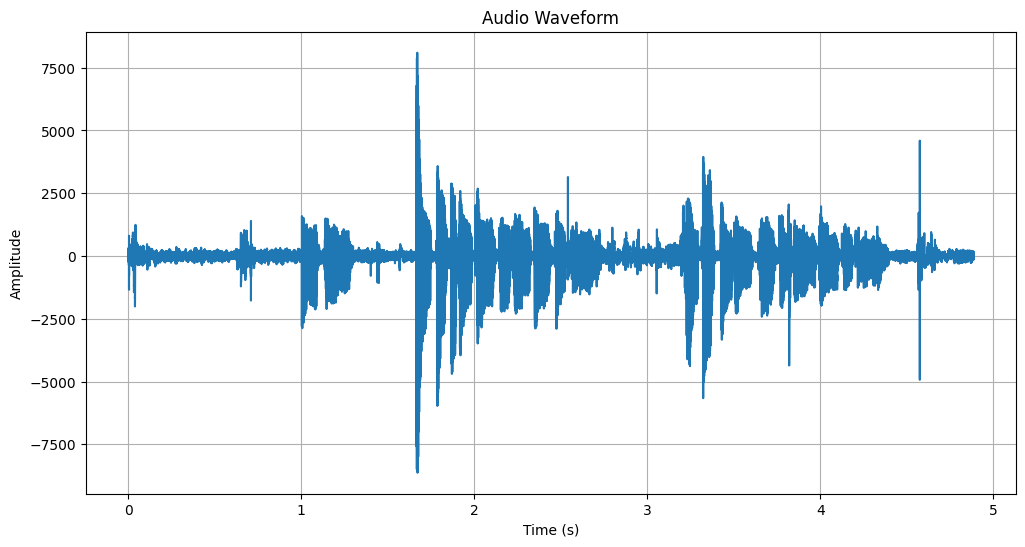

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def read_hex_file(file_path):
    with open(file_path, 'r') as file:
        hex_data = file.read().strip()
    
    if len(hex_data) % 4 != 0:
        raise ValueError("Hex data length is not a multiple of 4")
    
    int_data = []
    top_count = 0
    bottom_count = 0
    for i in range(0, len(hex_data), 4):
        hex_str = hex_data[i:i+4]
        try:
            # 转换为 16 位有符号整数
            value = int(hex_str, 16)
            if value >= 0x8000:
                value -= 0x10000
            int_data.append(value)
            # 调试信息：计数并打印接近顶和底的值
            if value >= 32760:
                top_count += 1
                print(f"Hex: {hex_str} -> Int: {value} (Top)")
            elif value <= -32760:
                bottom_count += 1
                print(f"Hex: {hex_str} -> Int: {value} (Bottom)")
        except ValueError:
            print(f"Invalid hex value: {hex_str}")
    
    # 打印接近顶和底的值的数量
    print(f"Number of values close to top (>= 32760): {top_count}")
    print(f"Number of values close to bottom (<= -32760): {bottom_count}")
    # 打印读取的整数数据总数
    print(f"Read {len(int_data)} samples from file.")
    
    return np.array(int_data)

def plot_waveform(data, sample_rate=44100):
    # 创建时间数组
    time = np.arange(len(data)) / sample_rate

    plt.figure(figsize=(12, 6))
    plt.plot(time, data)
    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # 读取 data.txt 文件
    audio_data = read_hex_file('data.txt')
    
    if audio_data.size == 0:
        print("No valid data to plot.")
    else:
        # 将数据缩放到合理范围内（根据需要调整缩放比例）
        audio_data = np.clip(audio_data, -32768, 32767)

        # 描绘波形
        plot_waveform(audio_data)


In [28]:
149568 / 16000

9.348

In [34]:
import numpy as np
import wave

def read_hex_file(file_path):
    with open(file_path, 'r') as file:
        hex_data = file.read().strip()
    
    if len(hex_data) % 4 != 0:
        raise ValueError("Hex data length is not a multiple of 4")
    
    int_data = []
    top_count = 0
    bottom_count = 0
    for i in range(0, len(hex_data), 4):
        hex_str = hex_data[i:i+4]
        try:
            # Convert to 16-bit signed integer
            value = int(hex_str, 16)
            if value >= 0x8000:
                value -= 0x10000
            int_data.append(value)
            # Count values close to top and bottom
            if value >= 32760:
                top_count += 1
            elif value <= -32760:
                bottom_count += 1
        except ValueError:
            print(f"Invalid hex value: {hex_str}")
    
    # Print count of values close to top and bottom
    print(f"Number of values close to top (>= 32760): {top_count}")
    print(f"Number of values close to bottom (<= -32760): {bottom_count}")
    # Print total number of read samples
    print(f"Read {len(int_data)} samples from file.")
    
    return np.array(int_data, dtype=np.int16)

def save_to_wav(data, file_path, sample_rate=16000):
    with wave.open(file_path, 'w') as wf:
        wf.setnchannels(1)  # Mono
        wf.setsampwidth(2)  # 16 bits
        wf.setframerate(sample_rate)
        wf.writeframes(data.tobytes())
    print(f"Saved audio data to {file_path}")

if __name__ == "__main__":
    # Read data.txt file
    audio_data = read_hex_file('data.txt')
    
    if audio_data.size == 0:
        print("No valid data to save.")
    else:
        # Save to WAV file
        save_to_wav(audio_data, 'output.wav')


Number of values close to top (>= 32760): 0
Number of values close to bottom (<= -32760): 0
Read 215460 samples from file.
Saved audio data to output.wav
